<a href="https://colab.research.google.com/github/josieltonsantos/Precipitacao_CHIRPS/blob/main/CHIRPS_prec_sergipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para rodar corretamente este script é necessário baixar e carregar os aqruivos .tif contendo o observado e anomalia de precipitação do mês (TotalPrecip_06 e Anomaly_06) e trimestre (TotalPrecip_18 e Anomaly_18) corrente do portal CHISPS 2.0.
https://www.chc.ucsb.edu/data/chirps

# 1 - Instalar e importar as bibliotecas necessárias

In [ ]:
!pip install  cartopy

In [ ]:
!pip install rioxarray

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import rioxarray

# 2 - Abrir os arquivos

Para continuar deve-se fazer upload dos quatro arquivos para o armazenamento da sessão e inserir o caminho correspondente.

In [ ]:
mensal = rioxarray.open_rasterio('/content/TotalPrecip_06PentAccum_Current.tif')
anom_mensal = rioxarray.open_rasterio('/content/Anomaly_06PentAccum_Current.tif')
trimestre = rioxarray.open_rasterio('/content/TotalPrecip_18PentAccum_Current.tif')
anom_trimestre = rioxarray.open_rasterio('/content/Anomaly_18PentAccum_Current.tif')

# 3 - Definir período e região de análise

In [ ]:
# insira o mês e ano de análise Ex.: "Dezembro de 2024"
mesatual = 'Janeiro de 2024'

In [ ]:
# esse intervalo descreve um retângulo que contêm o Estado de Sergipe
lon = slice(-38.5, -36) # intervalo de longitude
lat = slice(-9,-12) # intervalo de latitude

In [ ]:
mensal = mensal.sel(x=lon, y=lat)
anom_mensal = anom_mensal.sel(x=lon, y=lat)
trimestre = trimestre.sel(x=lon, y=lat)
anom_trimestre = anom_trimestre.sel(x=lon, y=lat)

# 4 - Impressão

In [ ]:
# Insira o caminho para a imagem com a seta norte.
imgg = Image.open('/content/nsimpls.jpg')

In [ ]:
# Definir as classes (ls) ex.: np.arange(min, max, step)

ls_mensal = np.arange(0, 110, 10)
ls_tri = np.arange(0, 200, 20)
ls_anom_mensal = np.arange(-60, 60, 5)
ls_anom_tri = np.arange(-130, 130, 10)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


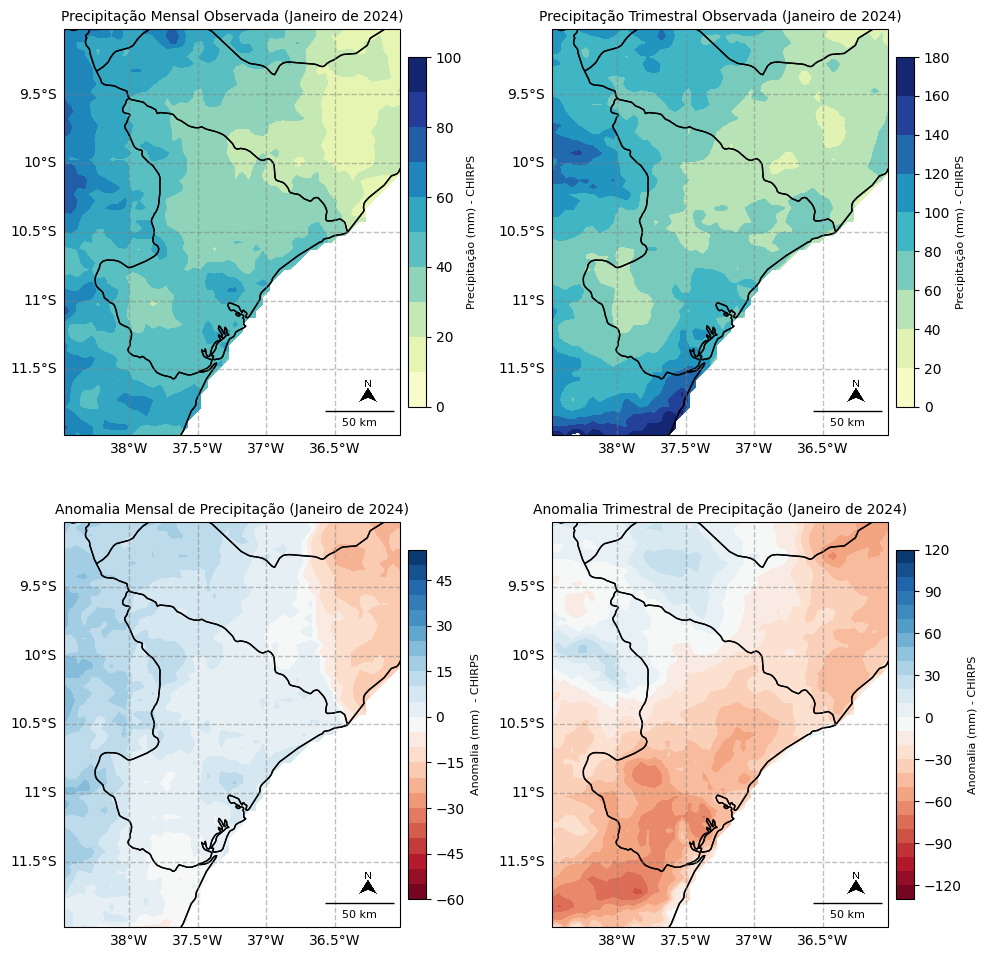

In [12]:
# Função para plotar cada subplot
def plot_map(ax, data, cmap, levels, title, cbar_label):
    proj = ccrs.PlateCarree()
    lon = data.coords['x'].values
    lat = data.coords['y'].values

    # Plotar dados
    cs = ax.contourf(lon, lat, data.squeeze(), cmap=cmap, levels=levels, transform=proj)

    # Configurações do mapa
    ax.set_title(title, fontsize=10)
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=proj)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)

    # Adicionar grades
    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
    gl.right_labels = False
    gl.top_labels = False

    # Barra de cores
    cbar = plt.colorbar(cs, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.ax.set_ylabel(cbar_label, fontsize=8)

    # Adicionar escala
    scalebar = AnchoredSizeBar(ax.transData, 0.5, '50 km', 'lower right', pad=0.5, sep=5,
                               color='black', frameon=False, size_vertical=0.0025, fontproperties={'size': 8})
    ax.add_artist(scalebar)

    # Adicionar seta norte
    im = OffsetImage(imgg, zoom=0.12, alpha=1)
    ab = AnnotationBbox(im, (-36.265, -11.65), xycoords='data', frameon=False)
    ax.add_artist(ab)

# Criar figura e subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar mapas
plot_map(axs[0, 0], mensal, 'YlGnBu', ls_mensal,
         f'Precipitação Mensal Observada ({mesatual})', 'Precipitação (mm) - CHIRPS')
plot_map(axs[0, 1], trimestre, 'YlGnBu', ls_tri,
         f'Precipitação Trimestral Observada ({mesatual})', 'Precipitação (mm) - CHIRPS')
plot_map(axs[1, 0], anom_mensal, 'RdBu', ls_anom_mensal,
         f'Anomalia Mensal de Precipitação ({mesatual})', 'Anomalia (mm)  - CHIRPS')
plot_map(axs[1, 1], anom_trimestre, 'RdBu',ls_anom_tri,
         f'Anomalia Trimestral de Precipitação ({mesatual})', 'Anomalia (mm) - CHIRPS')

# Ajustar espaçamento
plt.tight_layout()
plt.savefig(f'PREC_{mesatual}_se_CHIRPS.png', dpi=300)
# Exibir figura
plt.show()